# Tarea 2. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el día en que realicen la tarea.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [2]:
# Importando librerias 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [3]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'GOOG', 'TSLA', 'PG', 'META', 'UNH', 'XOM', 'LLY', 'JPM', 'JNJ', 'V']
df = yf.download(tickers, start="2015-01-01", end="2023-09-11")['Adj Close'] 
df.head()

[*********************100%%**********************]  15 of 15 completed


,AAPL,AMZN,GOOG,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,PG,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,
2015-01-02,24.498676,15.4260,26.168653,26.477501,82.477371,49.209702,58.391060,78.449997,40.534851,4.833229,70.417191,14.620667,88.216133,62.381359,62.658447
2015-01-05,23.808517,15.1095,25.623152,25.973000,81.901344,47.681980,57.815998,77.190002,40.162098,4.751594,70.082375,14.006000,86.763107,61.004383,60.944000
2015-01-06,23.810762,14.7645,25.029282,25.332001,81.498886,46.445633,58.107697,76.150002,39.572620,4.607536,69.763153,14.085333,86.588028,60.611294,60.619984
2015-01-07,24.144632,14.9210,24.986401,25.257500,83.298050,46.516510,57.699299,76.150002,40.075405,4.595531,70.129089,14.063333,87.472099,61.423378,61.234226
2015-01-08,25.072327,15.0230,25.065184,25.345501,83.953011,47.555992,59.066143,78.180000,41.254353,4.768403,70.931076,14.041333,91.647453,62.247219,62.253468


Text(0.5, 1.0, 'Precios')

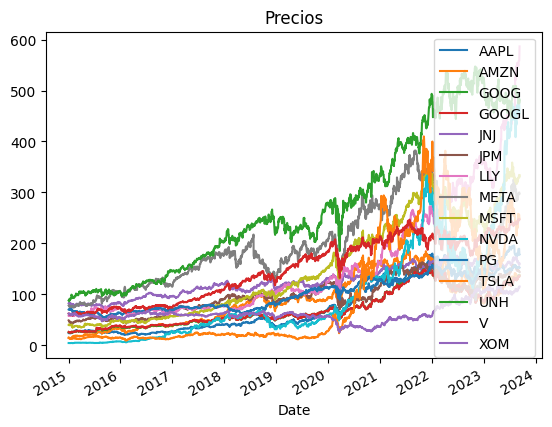

In [4]:
#Graficando los precios
df.plot()
plt.title('Precios')

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [4]:
rt_anual =  df.pct_change().dropna()
rt_anual

,AAPL,AMZN,GOOG,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,PG,TSLA,UNH,V,XOM,^GSPC
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.020846,-0.019054,-0.006984,-0.031045,-0.009849,-0.016061,-0.009196,-0.016890,-0.004755,-0.042041,-0.016471,-0.022074,-0.027362,-0.018278
2015-01-06,0.000094,-0.022833,-0.023177,-0.024679,-0.004914,-0.025929,0.005045,-0.013473,-0.014677,-0.030318,-0.004555,0.005664,-0.002018,-0.006444,-0.005316,-0.008893
2015-01-07,0.014022,0.010600,-0.001713,-0.002941,0.022076,0.001526,-0.007028,0.000000,0.012705,-0.002605,0.005245,-0.001562,0.010210,0.013398,0.010132,0.011630
2015-01-08,0.038422,0.006836,0.003153,0.003484,0.007863,0.022346,0.023689,0.026658,0.029418,0.037617,0.011436,-0.001564,0.047734,0.013413,0.016645,0.017888
2015-01-09,0.001072,-0.011749,-0.012951,-0.012211,-0.013629,-0.017387,-0.013263,-0.005628,-0.008405,0.004028,-0.009330,-0.018802,-0.009360,-0.014823,-0.001410,-0.008404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,0.008463,0.000797,-0.004004,-0.003745,-0.007422,0.003349,0.005251,0.001656,0.002746,-0.017141,0.001101,-0.050643,-0.000713,0.009891,0.020955,0.001799
2023-09-05,0.001267,-0.006154,-0.000658,0.000811,0.001246,-0.011034,0.001939,0.012720,0.014879,0.000804,-0.013397,0.046855,0.009596,-0.011164,0.000088,-0.004194
2023-09-06,-0.035793,-0.013914,-0.009802,-0.009649,-0.016617,-0.001653,0.003153,-0.003265,-0.002009,-0.030550,-0.001968,-0.017817,-0.008049,0.003342,0.008632,-0.006972


Text(0.5, 1.0, 'Rendimientos')

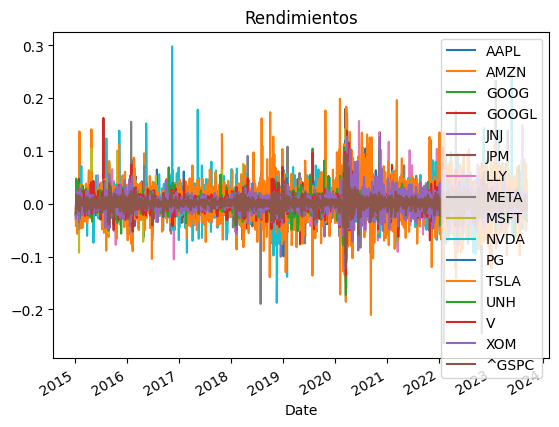

In [5]:
rt_anual.plot()
plt.title('Rendimientos')

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [6]:
#Caculando el rendimiento medio diario y despues multiplicarlo por 252 para anualizarlo. Se multtiplica por 252
#Porque el ciclo anual en bolsa tiene 252 dias
rt_anual = df.pct_change().dropna()

rendimiento = rt_anual.mean() * 252 
rendimiento



AAPL     0.272139
AMZN     0.308343
GOOG     0.231922
GOOGL    0.229705
JNJ      0.093961
JPM      0.163150
LLY      0.303623
META     0.226951
MSFT     0.282738
NVDA     0.641751
PG       0.107340
TSLA     0.487629
UNH      0.230305
V        0.191159
XOM      0.111977
^GSPC    0.106311
dtype: float64

In [7]:
#Calculando la volatilidad 
volatilidad = rt_anual.std() * np.sqrt(252)
volatilidad

AAPL     0.293916
AMZN     0.333601
GOOG     0.286096
GOOGL    0.285433
JNJ      0.184914
JPM      0.281186
LLY      0.275266
META     0.379203
MSFT     0.280531
NVDA     0.486259
PG       0.189275
TSLA     0.567501
UNH      0.263206
V        0.254279
XOM      0.287536
^GSPC    0.184926
dtype: float64

In [8]:
df = pd.DataFrame()
df['rendimiento'] = rendimiento 
df['volatilidad'] = volatilidad
df

,rendimiento,volatilidad
AAPL,0.272139,0.293916
AMZN,0.308343,0.333601
GOOG,0.231922,0.286096
GOOGL,0.229705,0.285433
JNJ,0.093961,0.184914
JPM,0.163150,0.281186
LLY,0.303623,0.275266
META,0.226951,0.379203
MSFT,0.282738,0.280531
NVDA,0.641751,0.486259


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (específicamente acerca de $\beta_0$ y $\beta_1$) (20 puntos).

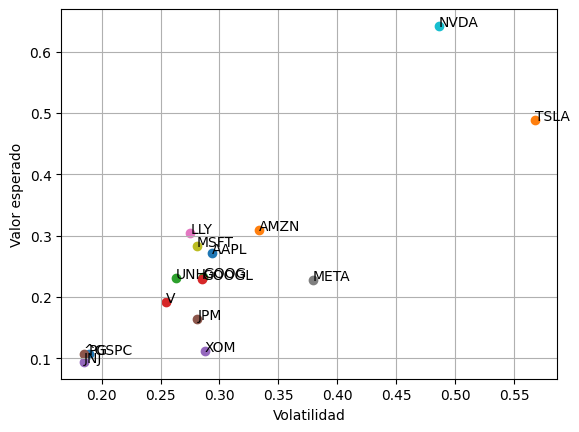

In [9]:
#Creando un ciclo for para iterar con todos los datos de las columnas
for i in range(len(df)): 
    flag_df = df.iloc[i]
    name = df.index[i]
    plt.scatter(flag_df['volatilidad'], flag_df['rendimiento'])
    plt.text(flag_df['volatilidad'], flag_df['rendimiento'], name)
plt.xlabel('Volatilidad')
plt.ylabel('Valor esperado')
plt.grid()

In [10]:
X = df[['volatilidad']]
y = df[['rendimiento']]

model = LinearRegression().fit(X, y) 

In [11]:
model.intercept_

array([-0.11879791])

In [12]:
model.coef_

array([[1.21862562]])

In [13]:
df['regresion'] = model.predict(X)

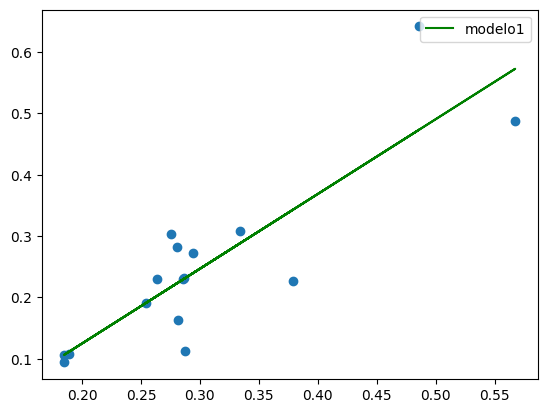

In [18]:
plt.scatter(df.volatilidad, df.rendimiento) 
plt.plot(df.volatilidad, df.regresion, label= 'modelo1', c='g')
plt.legend()

In [ ]:
#Al estar la B0 y B1 tan cercas de cero significa que preponderantemente los valores no suelen alejarse mucho de la recta, por lo que en 
#general el valor del portafolio tiene un riesgo bajo. 